In [376]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json


def get_filepath(state):
    return '../data/{state}/'.format(state=state)
def get_filepath_city(city):
    return '../data/' + city + '-bike/'

CITIES = ['dc', 'boston', 'chicago', 'nyc', 'philadelphia']
STATES = ['dc', 'ma', 'il', 'ny', 'pa']
START_YEARS = [2010, 2011, 2013, 2013, 2016]
YEARS_LISTS = {'dc': range(2010, 2023),
        'boston': range(2011, 2023),
        'chicago': range(2013, 2023),
        'nyc': range(2013, 2023),
        'philadelphia': range(2016, 2023)
}
                    
                    

all_area =  False


0.5616023530851524 dc
0.4976211209799821 boston
0.5029859368073872 chicago
0.6797677158206412 nyc
0.595972187186323 philadelphia
{'dc': [0.4864066655589679, 0.49345175502456334, 0.5005240791707528, 0.5049055399080372, 0.5069625209620499, 0.5074671908115534, 0.5061973882227293, 0.5042307940962834, 0.5022478124601137, 0.5060796653577878, 0.5060796653577878, 0.5060796653577878, 0.5060796653577878], 'boston': [0.5927637431497937, 0.5926483223783133, 0.5906918065634426, 0.5861498888277358, 0.5825144800161369, 0.579080858928924, 0.5779332165704392, 0.5758752791345448, 0.5732213390310598, 0.5732213390310598, 0.5732213390310598, 0.5732213390310598], 'chicago': [0.48696759967975867, 0.4924851663563553, 0.49546671941618803, 0.49516385654029216, 0.49941334545835603, 0.5020368369964862, 0.50707520553131, 0.50707520553131, 0.50707520553131, 0.50707520553131], 'nyc': [0.42264641194396463, 0.4164394541219959, 0.4123495368353508, 0.4105493925882775, 0.4067575251441608, 0.4059571636953662, 0.4065913011

C:\Users\Walter\AppData\Local\Temp\ipykernel_45732\789971118.py:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


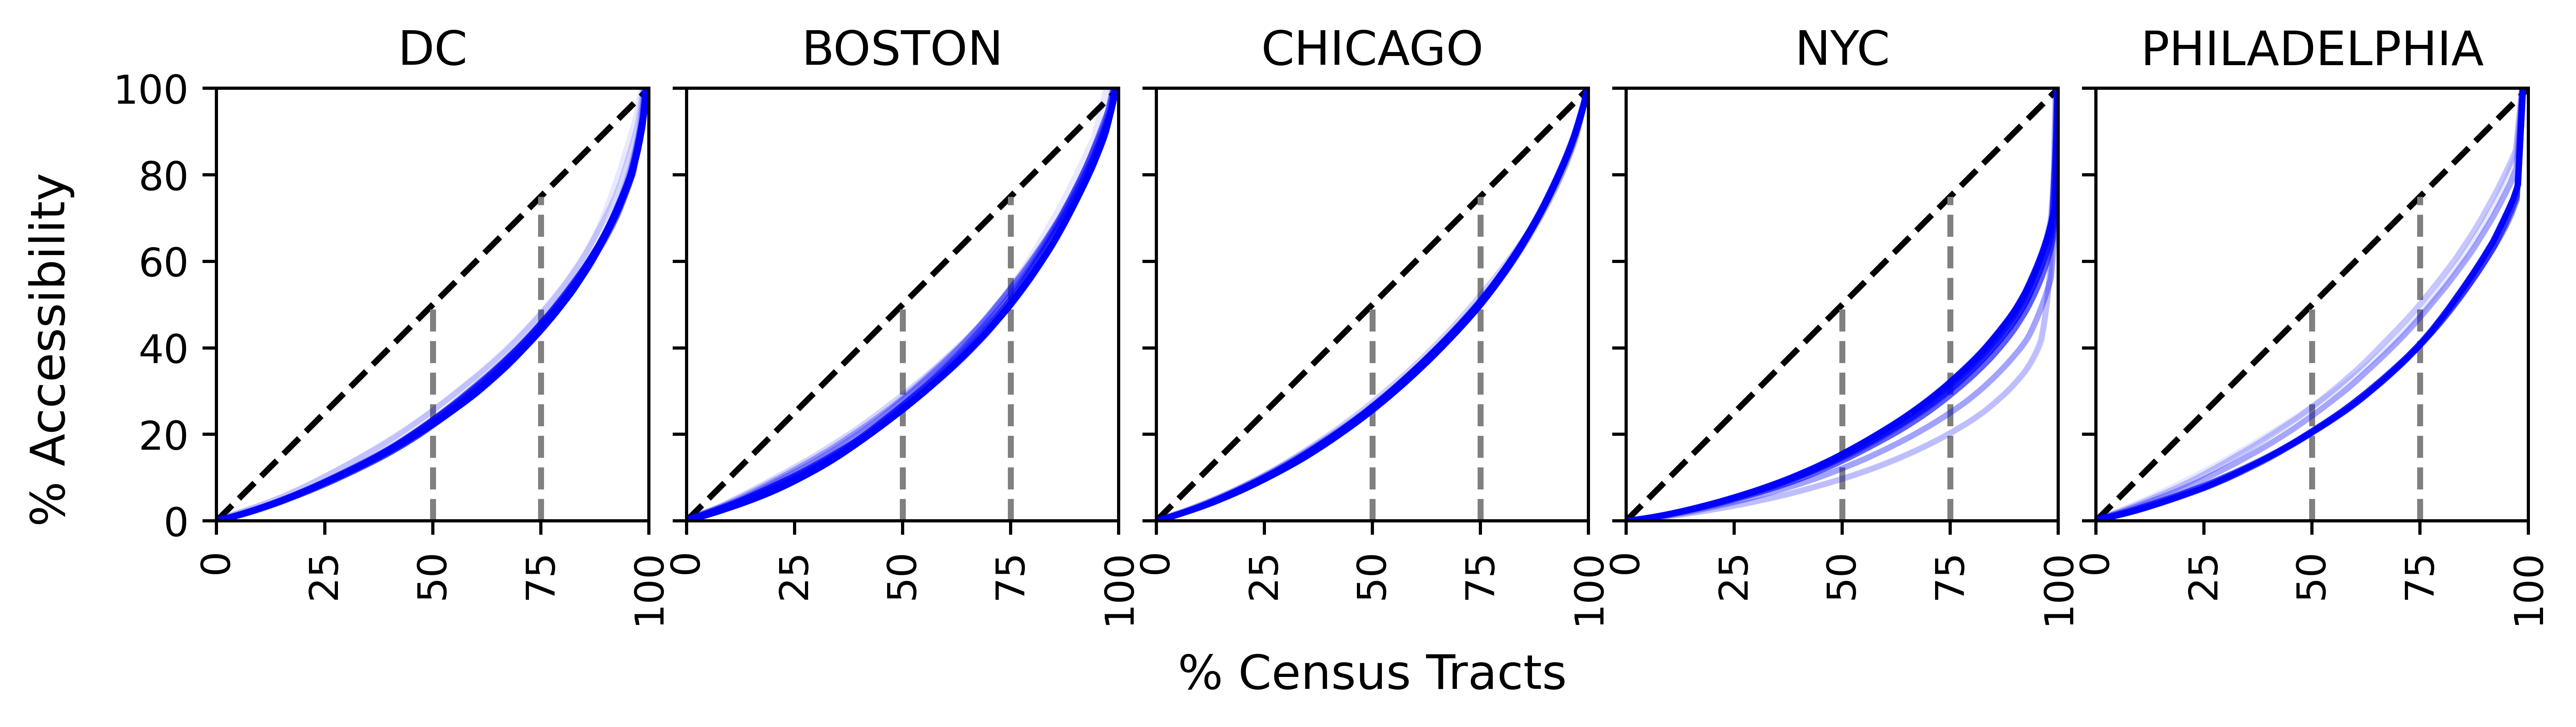

In [377]:



fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 2.4), sharey = True, dpi = 720)
ginis = {x: [] for x in CITIES}
tracts = {x: [] for x in CITIES}
cutoffs = {x: [] for x in CITIES}
avg_incomes = {x: [] for x in CITIES}
avg_race = {x:[] for x in CITIES}
for idx, STATE in enumerate(STATES):
    data_file = pd.read_csv(get_filepath(STATE) + f'{STATE}_preprocessed_data.csv')
    y_count = 0
    axs[idx].plot([0, 100], [0, 100], linestyle = 'dashed', color = 'black')
    axs[idx].plot([75, 75], [0, 75], linestyle = 'dashed', color = 'gray')
    axs[idx].plot([50, 50], [0, 50], linestyle = 'dashed', color = 'gray')
    YEARS = range(START_YEARS[idx], 2023)

    for year in YEARS:
        temp_data = data_file.loc[data_file['year'] == year]
        # pop = temp_data['households'].to_list()
        # to_use = temp_data['inServiceArea'].to_list()
        # total_pop = sum(pop)
        # bikes = temp_data['num_bikes'].to_list()
        # bikes = sum(bikes)

        data_list = list(temp_data.to_records())
        data_list.sort(key = lambda x: x[4]/x[5])
        households = [x[5] for x in data_list]
        num_white = [x[7] for x in data_list]
        percent_white  = sum(num_white)/sum(households)
        income = [x[6] for x in data_list]
        avg_incomes[CITIES[idx]].append(sum(income)/len(income))
        avg_race[CITIES[idx]].append(percent_white)

        if not all_area:
            data_list = [x for x in data_list if x[18]]
            tracts[CITIES[idx]].append(data_list)

       
        vals = [x[4]/x[5] for x in data_list]
       
        length  = len(vals)
        aggregate_density = (sum(vals))
        y = []
        for i, val in enumerate(vals):
            amount = (val + sum(vals[:i]))/aggregate_density
            y.append(amount*100)
            if i == int(length*3/4) and year == 2022:
                print(1-amount, CITIES[idx])
            
                
            
        cutoffs[CITIES[idx]].append(int((length*2)/4))
        
        # print(length)
        x = [i/length*100 for i in range(length)]

        lorence_a = np.trapz(y, x)
        total_a = np.trapz([0, 100], [0, 100])
        gini = (total_a - lorence_a)/total_a
        
        axs[idx].plot(x, y, alpha = 1 - (2023 - year)/(1.1*len(YEARS)), color = 'blue')
        
        axs[idx].set_xlim(0, 100)
        axs[idx].set_ylim(0, 100)
        ginis[CITIES[idx]].append(gini)

        y_count += 1
    axs[idx].set_title(CITIES[idx].upper(), fontsize = 12)
    axs[idx].set_aspect('equal')
    axs[idx].set_xticks([0, 25, 50, 75, 100])
    axs[idx].set_xticklabels([0, 25, 50, 75, 100], rotation=90)

# print(cutoffs)
# print(avg_incomes)
print(avg_race)
print(ginis)
fig.show()

# fig.suptitle(f'{CITY.upper()} Gini Index {YEARS[0]} - {YEARS[-1]}', fontsize = 'xx-large')
fig.supylabel('% Accessibility', fontsize = 12)
axs[2].set_xlabel('% Census Tracts', fontsize = 12, labelpad=7)
# fig.tight_layout()
fig.subplots_adjust(left =.08)
fig.subplots_adjust(bottom = .25)
fig.subplots_adjust(wspace=.01, hspace=0)

# plt.savefig(f'./plots/{CITY}/{CITY}_GINI_service_area.jpg',bbox_inches='tight', dpi=150)

    

75418.23161764706
79287.52398523985
81816.30258302583
83828.16974169742
86354.53505535056
87998.80073800738
90404.12915129152
94809.35793357933
98178.85925925926
103060.85130111524
103060.85130111524
103060.85130111524
103060.85130111524
59528.333333333336
60966.4918699187
61618.36842105263
63577.574898785424
64710.313008130084
68450.96356275304
72541.97154471544
77164.06910569106
82123.23577235773
82123.23577235773
82123.23577235773
82123.23577235773
48884.24171779141
49602.755828220856
50171.51105651106
52011.512315270935
54744.88683886839
57941.161963190185
61129.54791154791
61129.54791154791
61129.54791154791
61129.54791154791
56769.1817721519
57719.08700050582
58401.088877602844
60527.79289340101
63281.095528455284
66440.82604272634
70066.79224093925
70066.79224093925
70066.79224093925
70066.79224093925
43425.521390374335
44479.697860962566
47280.93029490617
49446.38069705094
49446.38069705094
49446.38069705094
49446.38069705094


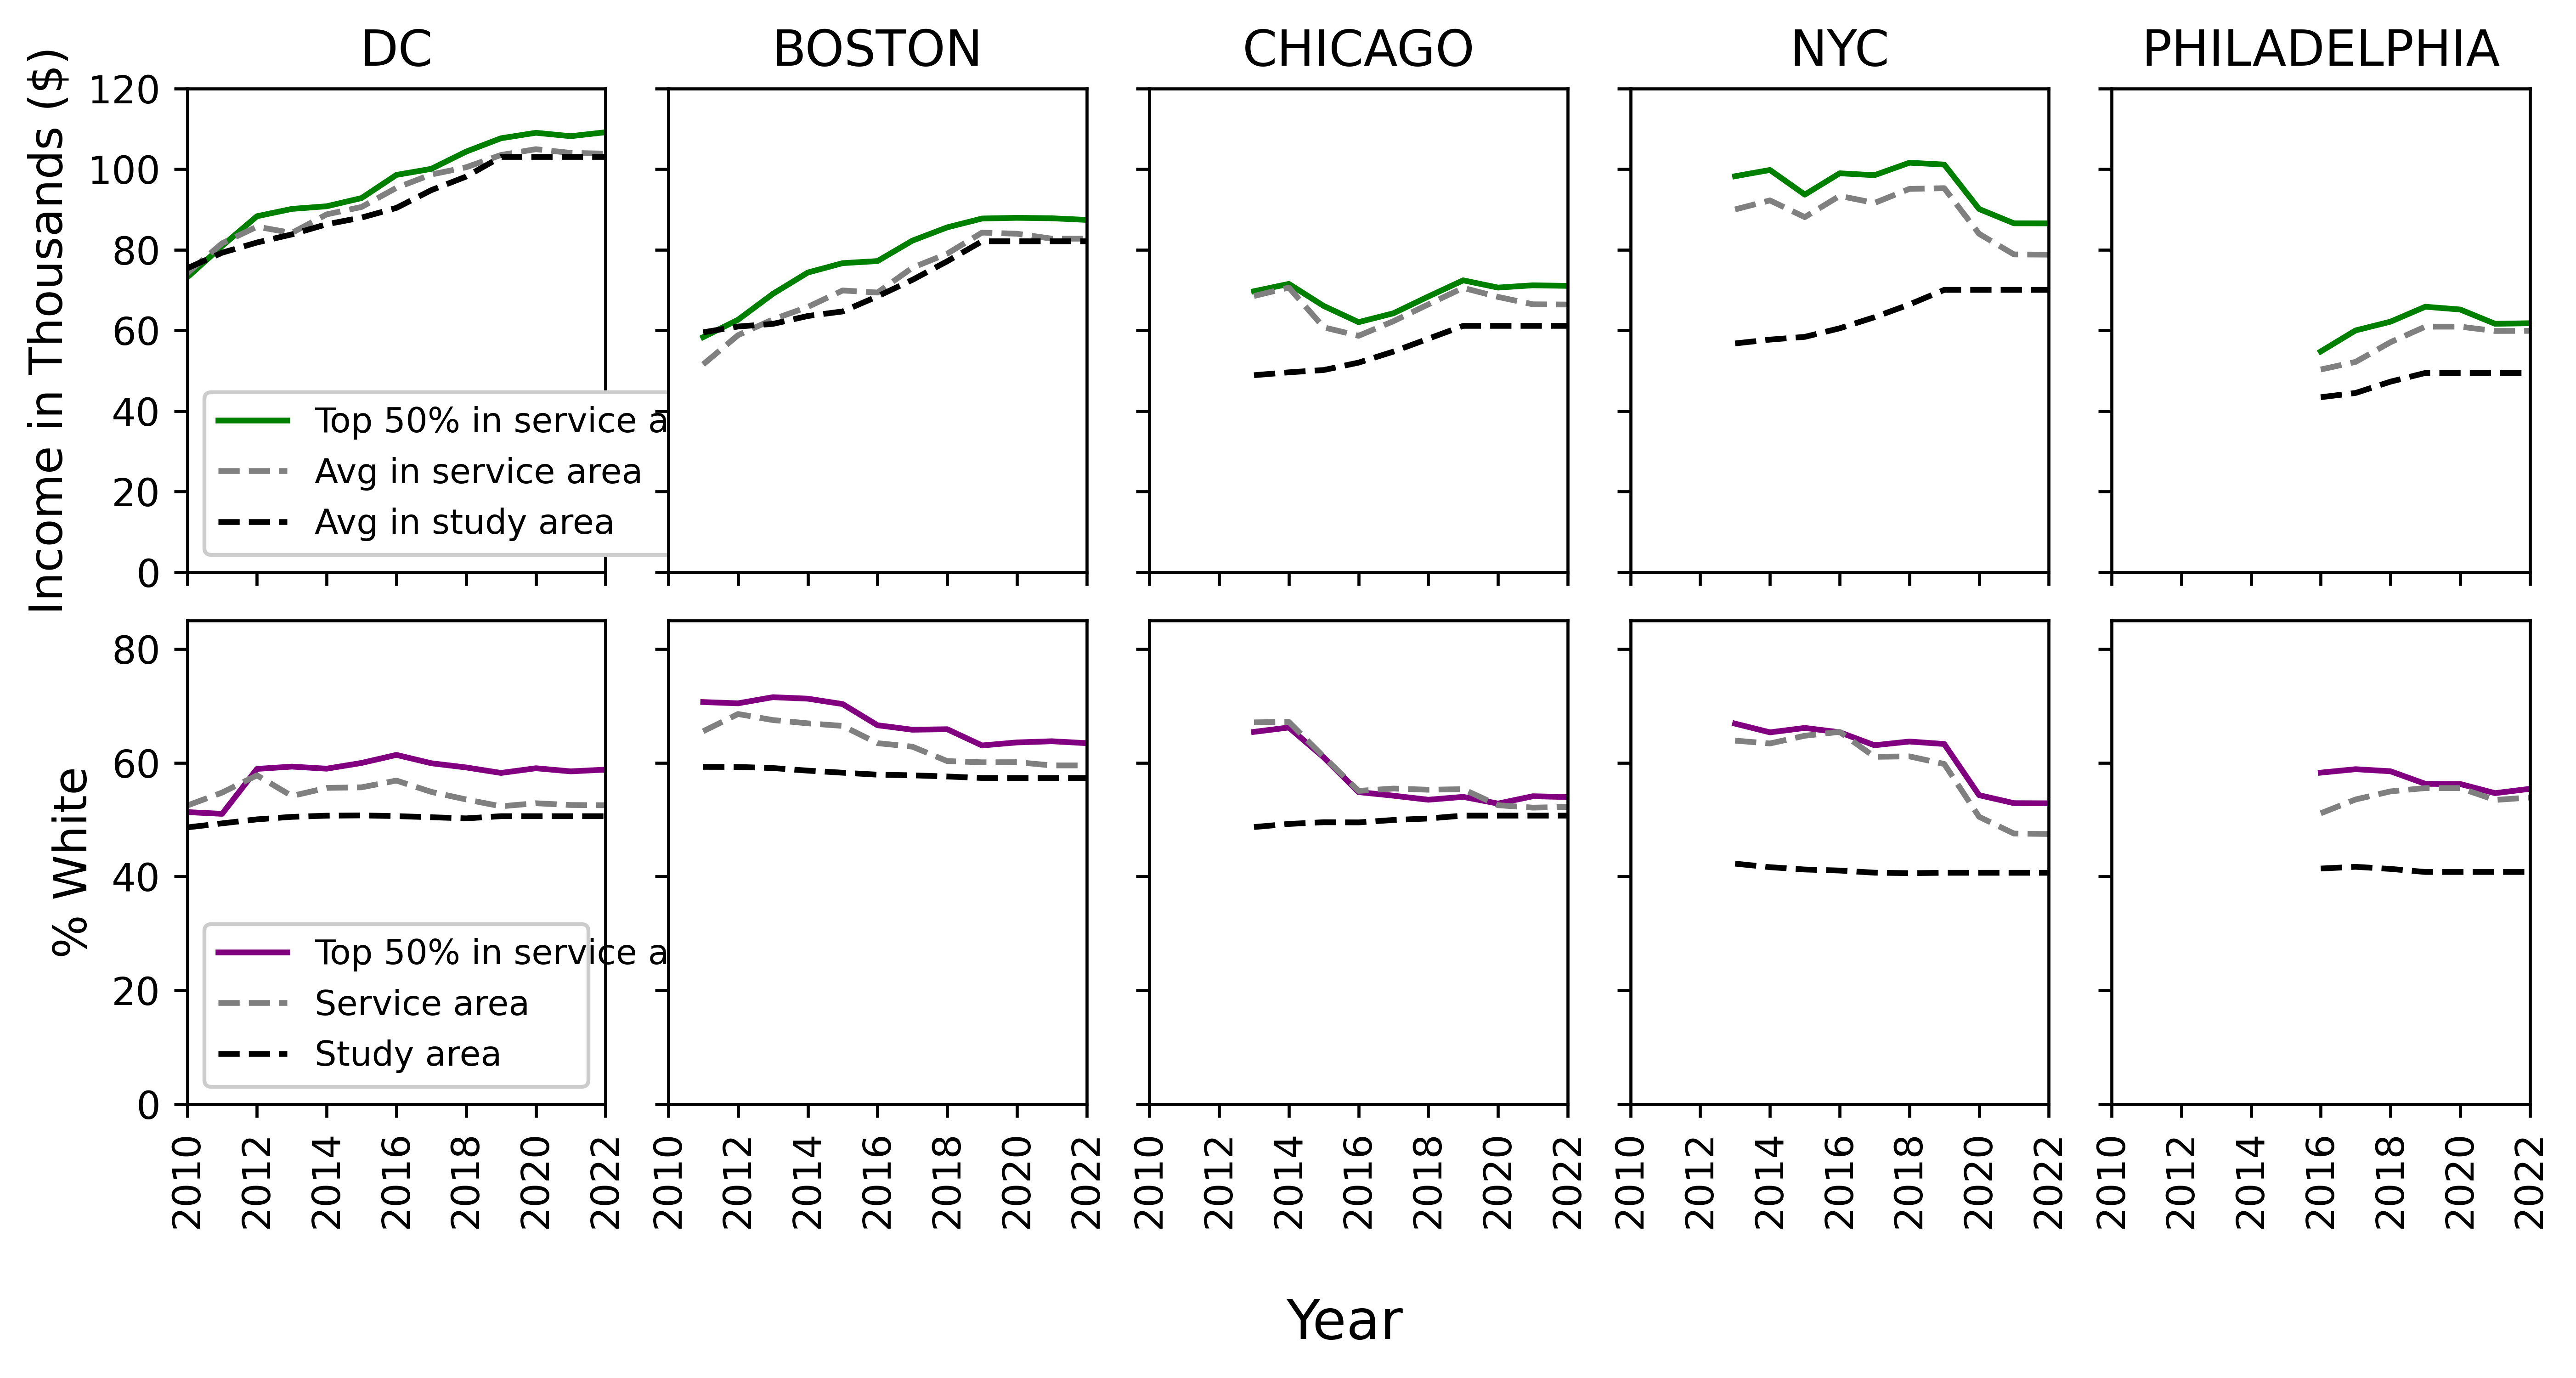

In [380]:

fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5),sharey = 'row',sharex = 'col',  dpi = 600)

count = 0
for CITY in cutoffs:
    x = YEARS_LISTS[CITY]
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    for idx, cutoff in enumerate(cutoffs[CITY]):
        service_area_households = [x[5] for x in tracts[CITY][idx]]
        service_area_num_white = [x[7] for x in tracts[CITY][idx]]
        service_area_percent_white = sum(service_area_num_white)/sum(service_area_households)
        avg_pct_white_top = sum(service_area_num_white[cutoff:])/sum(service_area_households[cutoff:])
        # print(len(pct_white[cutoff:])/len(pct_white), CITY)
        
        income = [x[6] for x in tracts[CITY][idx]]
        # print(len(income), len(pct_white))
        avg_income = avg_incomes[CITY][idx]
        print(avg_income)
        avg_income_top = sum(income[cutoff:])/len(income[cutoff:])
        y1.append(service_area_percent_white*100)
        y2.append((avg_pct_white_top)*100)
        y3.append(sum(income)/len(income))
        y4.append(avg_income_top)
        
    axs[1, count].plot(x, y2, color = 'purple', label = 'Top 50% in service area')
    axs[0, count].plot(x, [val/1000 for val in y4], color = 'green', label = 'Top 50% in service area')
    axs[1, count].plot(x, y1, color = 'grey', linestyle = 'dashed', label = 'Service area')
    axs[0, count].plot(x, [val/1000 for val in y3], color = 'grey', linestyle = 'dashed', label = 'Avg in service area')
    axs[1, count].plot(x, [val*100 for val in avg_race[CITY]], linestyle = 'dashed', color = 'black', label = 'Study area')
 
    axs[0, count].plot(x, [val/1000 for val in avg_incomes[CITY]], linestyle = 'dashed', color = 'black', label = 'Avg in study area')
    

    axs[1, count].set_ylim(0, 85)
    axs[1, count].set_xlim(2010, 2022)
    axs[0, count].set_xlim(2010, 2022)
    axs[0, count].set_ylim(0, 120)
    axs[0, count].set_title(CITY.upper(), fontsize = 13)
    axs[1, count].set_xticks([2010, 2012, 2014, 2016, 2018, 2020, 2022])
    axs[1, count].set_xticklabels([2010, 2012, 2014, 2016, 2018, 2020, 2022], rotation=90)
    

    count += 1
axs[0, 0].legend(loc = 'lower left', prop = {'size': 9}, framealpha = 1)
axs[1, 0].legend(loc = 'lower left', prop = {'size': 9}, framealpha = 1)
axs[1, 0].set_ylabel('% White', fontsize = 'large')
axs[0, 0].set_ylabel('Income in Thousands ($)', fontsize = 'large')
# handles1, labels1 = axs[1, 4].get_legend_handles_labels()
# handles2, labels2 = axs[0, 4].get_legend_handles_labels()
# fig.legend(handles1+handles2, labels1+labels2, framealpha = 1)  
# fig.suptitle("Difference Between the Percent White Makeup of the Census Tracts Containing the Top 25% of Accessibility and the Average Percent White of Each City's Service Area Over Time", fontsize = 'xx-large')
# fig.supylabel('Difference in Percent Points', fontsize = 'x-large')
fig.supxlabel('Year', fontsize = 'x-large')
fig.tight_layout()
fig.subplots_adjust(left=.08)
fig.subplots_adjust(right = .93)
fig.subplots_adjust(wspace=.15, hspace=.1)


# fig2.suptitle("Difference Between the Average Income of the Census Tracts Containing the Top 25% of Accessibility and the Avergage Income of Each City's Service Area Over Time", fontsize = 'xx-large')
